In [88]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [54]:
df = pd.read_csv('mystringdb.txt', sep=' ')
mydf = df[(df['combined_score'] >= 500)]
mydf[['ignore1', 'protein1']] = mydf['protein1'].str.split('.',expand=True)
mydf[['ignore2', 'protein2']] = mydf['protein2'].str.split('.',expand=True)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,protein1,protein2,combined_score,ignore1,ignore2
11759413,ENSP00000485678,ENSP00000303482,900,9606,9606
11759427,ENSP00000485678,ENSP00000312262,600,9606,9606
11759435,ENSP00000485678,ENSP00000481878,900,9606,9606
11759445,ENSP00000485678,ENSP00000296142,900,9606,9606
11759452,ENSP00000485678,ENSP00000367590,900,9606,9606


In [55]:
network = nx.from_pandas_edgelist(mydf, source = 'protein1', target = 'protein2')

In [57]:
highdegree = [n for n,d in network.degree if d > 100]  

In [58]:
lowdegree = [n for n,d in network.degree if d <= 100]

In [59]:
db = pd.read_csv('myensembldb.txt', sep='\t')

,Pfam ID,Protein stable ID
0,PF00146,ENSP00000354687
1,PF00361,ENSP00000355046
2,PF06444,ENSP00000355046
3,PF00115,ENSP00000354499
4,PF00116,ENSP00000354876


In [60]:
db.tail()

,Pfam ID,Protein stable ID
197376,PF04103,ENSP00000493798
197377,NaN,ENSP00000500653
197378,NaN,ENSP00000500283
197379,PF00009,ENSP00000494933
197380,PF00009,ENSP00000495578


In [61]:
mydb = db.dropna()

,Pfam ID,Protein stable ID
197374,PF17856,ENSP00000494625
197375,PF04103,ENSP00000495201
197376,PF04103,ENSP00000493798
197379,PF00009,ENSP00000494933
197380,PF00009,ENSP00000495578


In [81]:
hd_df = mydb[mydb['Protein stable ID'].isin(highdegree)]
ld_df = mydb[mydb['Protein stable ID'].isin(lowdegree)]

In [96]:
hd_df['degree'] = 'high degree'
ld_df['degree'] = 'low degree'

<ipython-input-96-c9eb8d8e7286>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_df['degree'] = 'high degree'
<ipython-input-96-c9eb8d8e7286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld_df['degree'] = 'low degree'


,Pfam ID,Protein stable ID,degree
1,PF00361,ENSP00000355046,low degree
2,PF06444,ENSP00000355046,low degree
6,PF00895,ENSP00000355265,low degree
8,PF00510,ENSP00000354982,low degree
10,PF00420,ENSP00000354728,low degree


In [100]:
final = pd.concat([hd_df,ld_df], axis=0)

,Pfam ID,Protein stable ID,degree
192111,PF15229,ENSP00000481613,low degree
192119,PF07686,ENSP00000479119,low degree
192125,PF07324,ENSP00000482514,low degree
192174,PF13853,ENSP00000480318,low degree
195972,PF00076,ENSP00000479365,low degree


In [168]:
plot = final.groupby(['degree', 'Protein stable ID'])['Pfam ID'].count().to_frame(name="Pfam ID").reset_index()

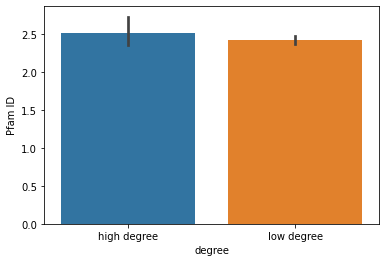

In [170]:
sns.barplot(x="degree", y="Pfam ID", data=plot)
plt.savefig('degree_barplot.png', dpi=300, bbox_inches='tight')